## Project Title
### Optimizing Gold Recovery: Developing a Machine Learning Model for Accurate Estimation in Mining Operations

## Introduction
#### The primary objective of this project is to ensure the accuracy of the raw data stored in the warehouse database. This involves meticulous data validation and correction processes. Ultimately, the goal is to develop a machine learning model capable of estimating the amount of gold recovery from the ore extracted by the mining company. This model will leverage the cleaned and validated data to provide reliable predictions, aiding in optimizing the mining operations and maximizing gold recovery.

In [1]:
## Installing the libraries in the dataframe
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model  import LinearRegression
from sklearn.tree  import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [2]:
## Loading the data on dataframe
gold_full = pd.read_csv("gold_recovery_full.csv")
gold_test = pd.read_csv("gold_recovery_test.csv")
gold_train = pd.read_csv("gold_recovery_train.csv")

In [3]:
## Looking at the data in columns
gold_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
## Looking at the data types
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [5]:
gold_full.duplicated().sum()

0

In [6]:
gold_full.isna().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

In [7]:
# checking on duplicated data
gold_train.duplicated().sum()

0

In [8]:
gold_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [9]:
## looking at datatypes
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [10]:
gold_test.duplicated().sum()

0

In [11]:
## Looking at the column datatypes 
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [12]:
gold_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


## Missing values 

In [13]:
gold_full.isna().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

In [14]:
## Looked at missing data
gold_train.isna().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [15]:
## Looked at missing data
gold_test.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


#####  Recovery percentage = (Concentration of gold in concentrate * Mass of concentrate) / (Concentration of gold in feed * Mass of feed) * 100;

In [16]:
def recovery_calc(row):
    
    con = row['rougher.output.concentrate_au']
    feed= row['rougher.input.feed_au']
    tail= row['rougher.output.tail_au']
    
    numerator = con* (feed- tail)
    denominator = feed * (con- tail)
    if denominator == 0:
        return 0
    else:
        return numerator/denominator*100

gold_recovery = gold_train.copy()
gold_recovery['recovery'] = gold_recovery.apply(lambda x: recovery_calc(x), axis=1)
                 
answer = (gold_recovery['recovery'] - gold_recovery['rougher.output.recovery']).abs().mean()

print('difference between expected value and calculate value {}'.format(answer))
            

difference between expected value and calculate value 9.303415616264301e-15


##### calculated the mean absolute error of the training set. The mae is around 9.30 which is pretty low that means that warehouse data is pretty accurate.

## Data preprocessing

In [17]:
gold_full.fillna(method='ffill',inplace=True)
gold_train.fillna(method='ffill',inplace=True)
gold_test.fillna(method='ffill', inplace=True)

C:\Users\Sohin\AppData\Local\Temp\ipykernel_121764\1836034040.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gold_full.fillna(method='ffill',inplace=True)
C:\Users\Sohin\AppData\Local\Temp\ipykernel_121764\1836034040.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gold_train.fillna(method='ffill',inplace=True)
C:\Users\Sohin\AppData\Local\Temp\ipykernel_121764\1836034040.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gold_test.fillna(method='ffill', inplace=True)


#### Found missing values in gold_full, train and test set columns. To maintain continuity of the data I used ffill method so the data can be filled by last known data in that column.

#### Creating a list of columns which are present in train set but not in test set.

In [18]:
train_not_test_columns = list(set(gold_train.columns)- set(gold_test.columns))
train_not_test_columns.sort()
train_not_test_columns

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

#### Created a list of columns not present in gold_train and gold_test data set.

In [19]:
gold_full.shape

(22716, 87)

In [20]:
gold_train.shape

(16860, 87)

In [21]:
gold_test.shape

(5856, 53)

In [22]:
gold_full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [23]:
gold_full_merge = gold_full[["date", "rougher.output.recovery", "final.output.recovery", "rougher.output.concentrate_au", 
    "rougher.output.concentrate_ag", "rougher.output.concentrate_pb", "rougher.output.concentrate_sol",                        
    "final.output.concentrate_au", "final.output.concentrate_ag", "final.output.concentrate_pb", 
                             "final.output.concentrate_sol"]]

In [24]:
gold_test = gold_test.merge(gold_full_merge, on="date", how="left")
gold_full_merge = gold_full_merge.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

In [25]:
gold_train = gold_train.drop("date", axis=1)
gold_test = gold_test.drop("date", axis=1)
gold_full = gold_full.drop("date", axis=1)

#### gold_test has less number of rows and columns than the train dataset.
#### Merging important columns needed for evaluation to testing dataset.
#### Dropped date column as it is not required for our further calculations.

## Analyze the data

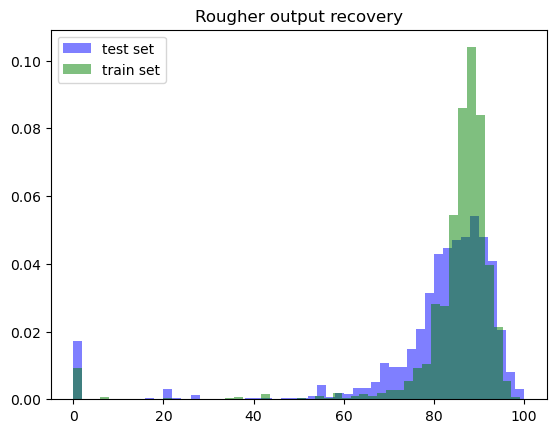

In [26]:
plt.hist(gold_train['rougher.output.recovery'],density=True, alpha= 0.5, bins=50, color= 'blue')
plt.hist(gold_test['rougher.output.recovery'], density=True, alpha= 0.5, bins=50, color= 'green')
plt.title("Rougher output recovery")
plt.legend(['test set', 'train set'])
plt.show()

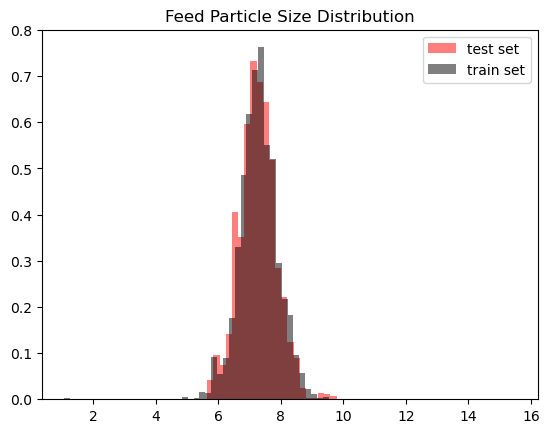

In [27]:
plt.hist(gold_test['primary_cleaner.input.feed_size'], density = True, alpha=0.5, bins = 50, color= 'red')
plt.hist(gold_train['primary_cleaner.input.feed_size'],density= True, alpha= 0.5, bins = 50, color= 'black')
plt.title("Feed Particle Size Distribution")
plt.legend(['test set', 'train set'])
plt.show()

##### Looked at the distribution of the feed size in the train set and test set. It looked pretty similar as most of the data is between 6- 8 cubic meter.  Which means there was no overfitting or underfitting.

In [28]:
au = gold_full[['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']]
ag = gold_full[['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]
pb = gold_full[['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]


C:\Users\Sohin\AppData\Local\Temp\ipykernel_121764\2061351614.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(au[column], ax=axes[0], kde=False)
C:\Users\Sohin\AppData\Local\Temp\ipykernel_121764\2061351614.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ag[column], ax=axes[1], kde=False

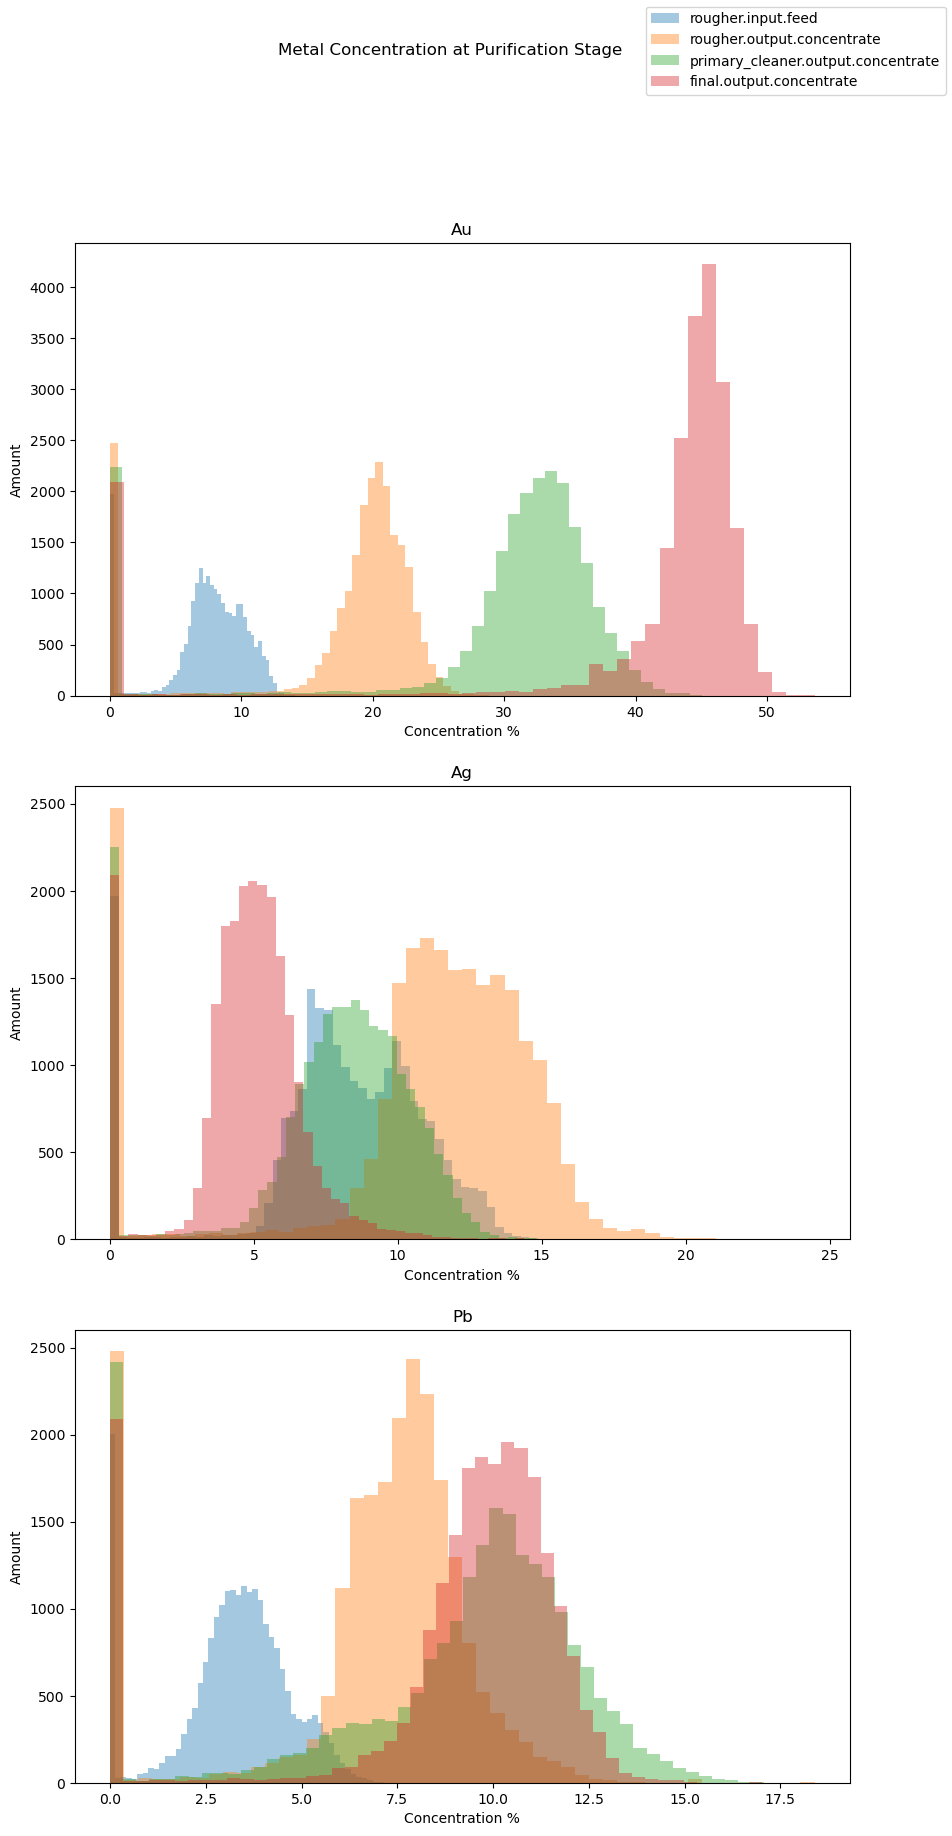

In [29]:
fig, axes = plt.subplots(3,1, figsize=(10, 20))
for column in list(au):
    sns.distplot(au[column], ax=axes[0], kde=False)
axes[0].set(title="Au", xlabel="Concentration %", ylabel="Amount")
for column in list(ag):
    sns.distplot(ag[column], ax=axes[1], kde=False)
axes[1].set(title="Ag", xlabel="Concentration %", ylabel="Amount")
for column in list(pb):
    sns.distplot(pb[column], ax=axes[2], kde=False)
axes[2].set(title="Pb", xlabel="Concentration %", ylabel="Amount")
fig.suptitle("Metal Concentration at Purification Stage")
fig.legend(['rougher.input.feed','rougher.output.concentrate','primary_cleaner.output.concentrate','final.output.concentrate'])
fig.show()

#### By looking at the concentration of au, ag and pbat different purification stages . I can say that Au(gold) is increasing consistently and visibly with each stage of purification. But Ag(silver) concentration is decreasing with each stage of purification. On the other hand PB(lead) is not increasing or decreasing.

In [30]:
def raw_feed(df):
    return df['rougher.input.feed_au'] + df['rougher.input.feed_ag']+ df['rougher.input.feed_pb'] + df['rougher.input.feed_sol']

In [31]:
def rougher_conc(df):
    return df['rougher.output.concentrate_au'] + df['rougher.output.concentrate_ag']+  df['rougher.output.concentrate_pb'] + df['rougher.output.concentrate_sol']

In [32]:
def final_conc(df):
    return df['final.output.concentrate_au'] + df['final.output.concentrate_ag'] + df['final.output.concentrate_pb'] + df['final.output.concentrate_sol']

In [33]:
gold_full['rougher.input.feed'] = raw_feed(gold_full)
gold_full['rougher.output.concentrate'] = rougher_conc(gold_full)
gold_full['final.output.concentrate'] = final_conc(gold_full)
total_conc = gold_full[['rougher.input.feed','rougher.output.concentrate', 'final.output.concentrate']]

### Merging all the individual data metal data together grouped by the feed and concentration status. It is done by creating the function so that it can be easier to call it multiple times.

C:\Users\Sohin\AppData\Local\Temp\ipykernel_121764\3659708129.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_conc[column], kde=False)


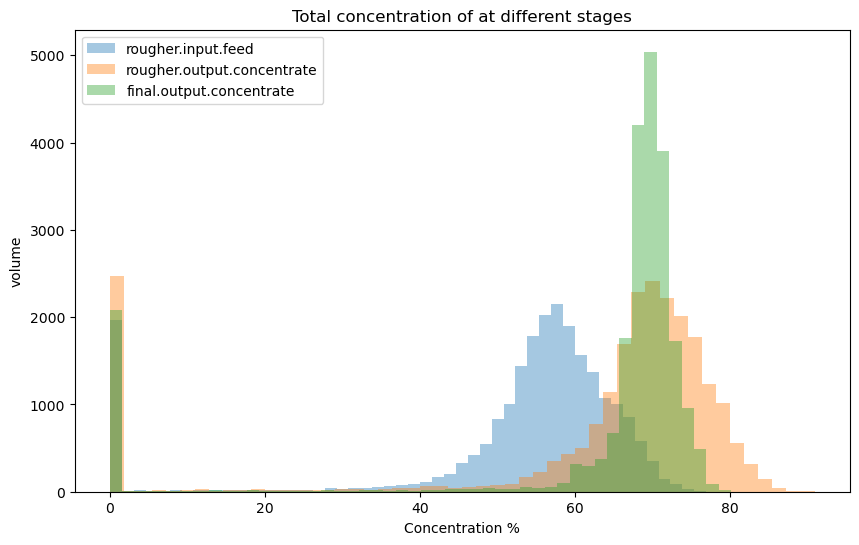

In [34]:
fig = plt.figure(figsize=(10,6))
for column in list(total_conc):
    sns.distplot(total_conc[column], kde=False)
plt.legend(list(total_conc)) 
plt.title('Total concentration of at different stages')
plt.xlabel('Concentration %')
plt.ylabel('volume')
plt.show()

### Above graph shows total concentration of all metals at different stages.Volume keeps increasing as we are moving towards the final output concentration. 

In [35]:
gold_train['rougher.input.feed']= raw_feed(gold_train)
gold_train['rougher.output.concentrate']= rougher_conc(gold_train)
gold_train['final.output.concentrate']= final_conc(gold_train)

In [36]:
gold_train = gold_train[(gold_train['rougher.input.feed'] > 20) & (gold_train['rougher.output.concentrate'] >20) & (gold_train['final.output.concentrate'] >20)]
gold_train = gold_train.drop(['rougher.input.feed','rougher.output.concentrate','final.output.concentrate'], axis=1)

In [37]:
gold_test['rougher.input.feed']= raw_feed(gold_test)
gold_test['rougher.output.concentrate']= rougher_conc(gold_test)
gold_test['final.output.concentrate']= final_conc(gold_test)

In [38]:
gold_test = gold_test[(gold_test['rougher.input.feed']>20) & (gold_test['rougher.output.concentrate']>20) & (gold_test['final.output.concentrate']>20)]
gold_test = gold_test.drop(['rougher.input.feed','rougher.output.concentrate','final.output.concentrate'], axis=1)
gold_test = gold_test.drop(list(gold_full_merge.columns.values), axis=1)

#### By looking at the data visualization we can conclude that there is some abnormal values among the range from 0-20 so that  data has been excluded from training set and test set as those value can result in inaccurate model training.

####  Build Models

In [39]:
## Function for calculation of sMAPE value

def final_smape(y,y_df):
    y_rougher = y.iloc[:,0]
    y_df_rougher = y_df.iloc[:,0]
    
    rougher_num = np.abs(y_rougher- y_df_rougher)
    rougher_den = (np.abs(y_rougher) + np.abs(y_df_rougher))/2
    smape_rougher = (np.mean(rougher_num/ rougher_den)) * 100
    
    y_final = y.iloc[:,1]
    y_df_final = y_df.iloc[:,1]
    
    final_num = np.abs(y_final - y_df_final)
    final_den = (np.abs(y_final) + np.abs(y_df_final))/2
    smape_final = (np.mean(final_num / final_den)) * 100
    
    final_smape = smape_rougher * 0.25 + smape_final * 0.75
    return final_smape

In [40]:
gold_train = gold_train.loc[:, list(gold_test.columns)]

## including all the rows which are present in gold_test list.

In [41]:
## assigning variables

features_train = gold_train.drop(columns=['rougher.output.recovery','final.output.recovery'], axis=1)
target_train = gold_train[['rougher.output.recovery','final.output.recovery']]


In [42]:
feature_scaler = StandardScaler()
features_train = feature_scaler.fit_transform(features_train)

In [43]:
features_train.shape

(14409, 52)

In [44]:
## assigning variables
features_test = gold_test.drop(columns=['rougher.output.recovery','final.output.recovery'], axis=1)
target_test = gold_test[['rougher.output.recovery','final.output.recovery']]
print(target_test)
features_test = feature_scaler.transform(features_test)

      rougher.output.recovery  final.output.recovery
0                   89.993421              70.273583
1                   88.089657              68.910432
2                   88.412756              68.143213
3                   87.360133              67.776393
4                   83.236367              61.467078
...                       ...                    ...
5851                95.172585              68.919891
5852                94.575036              68.440582
5853                93.018138              67.092759
5854                92.599042              68.061186
5855                91.177695              71.699976

[5244 rows x 2 columns]


In [45]:
def convert_to_dataframe(arr):
    if isinstance(arr, np.ndarray): 
        return pd.DataFrame(arr)
    return arr

features_train = convert_to_dataframe(features_train)
target_train = convert_to_dataframe(target_train)
    

#### Evaluation with cross- validation 

In [46]:
features_train = features_train.reset_index(drop=True)
target_train = target_train.reset_index(drop=True)        

In [47]:
from sklearn.model_selection import KFold

In [48]:
## Scoring

def score_model(model, cv=4):

    scores =[]
    for subtrain_index, valid_index in KFold(n_splits= cv). split(features_train):
        features_subtrain = features_train.loc[subtrain_index].reset_index(drop=True)
        target_subtrain = target_train.loc[subtrain_index].reset_index(drop=True)
        
        features_valid = features_train.loc[valid_index].reset_index(drop=True)
        target_valid = target_train.loc[valid_index].reset_index(drop=True)
        
        model.fit(features_subtrain, target_subtrain)
        pred_valid= pd.DataFrame(model.predict(features_valid))
        scores.append(final_smape(target_valid, pred_valid))
    return pd.Series(scores).mean()

In [49]:
state = np.random.RandomState(12345)

#### Cross validation with DecisionTree Regressor model 

In [50]:
print("Decision Tree")
for depth in range(10, 50, 10):
    model = DecisionTreeRegressor(max_depth = depth, random_state=state)
    scores = score_model(model)
print(scores)
print('max depth', ':', depth)

Decision Tree
15.355248251042301
max depth : 40


#### Cross validation with Linear Regression model 

In [51]:
## create model via LinearRegression
print("Linear Regression")
modellr = LinearRegression()
scores = score_model(modellr)
print(scores)

Linear Regression
10.667714921722874


#### After training different models the conclusion is  found Random Forest Regressor is the best model as it scored 10.01 which is lowest among all three models.  

In [52]:
## Testing the best model with test set
final_model = LinearRegression() 
final_model.fit(features_train, target_train)
predict= pd.DataFrame(final_model.predict(features_test))
smape = final_smape(target_test, predict)
print(smape)

9.04432306401928


#### The Random tree Regressor is the best model and when it was tested test sample it gave pretty similar results which means that model is performing consistently through different subsets of the data. So the model is neither overfitted or under fitted

#### The final model is trained by Random Forest Regressor model and final smape for the model is 8.51.


In [53]:
## Testing the constant model on test set
constant_model_mean = target_train.mean()
constant_model_test = pd.DataFrame(index=range(len(target_test)),columns=['rougher.output.recovery','final.output.recovery'])
constant_model_test['rougher.output.recovery'] = constant_model_mean[0]
constant_model_test['final.output.recovery'] = constant_model_mean[1]
constant_smape = final_smape(target_test,constant_model_test)
print("Constant model smape:", constant_smape)

Constant model smape: 7.620660008047213


C:\Users\Sohin\AppData\Local\Temp\ipykernel_121764\2589412473.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  constant_model_test['rougher.output.recovery'] = constant_model_mean[0]
C:\Users\Sohin\AppData\Local\Temp\ipykernel_121764\2589412473.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  constant_model_test['final.output.recovery'] = constant_model_mean[1]


#### The smape value of constant best model is 7.62 

### The Linear Regression is the best model and when it was tested test sample it gave pretty similar results which means that model is performing consistently through different subsets of the data. So the model is neither overfitted or under fitted.

## Conclusion:

#### The project was successful in creating the best model for optimal gold recovery.Firstly we analyzed the  mean absolute error (MAE) for the training set and it came out to be around 9.30. This is low value which suggests that in the warehouse database, indicating that the data in warehouse database is similar to actual values. By examining the concentration levels of gold (Au), silver (Ag), and lead (Pb) across various purification stages, we observed that Au consistently increases, Ag decreases, and Pb remains relatively constant. Despite the volume's progressive increase towards the final output concentration, the data revealed some abnormal values in the 0-20 range, which were excluded to maintain accuracy during model training. Examined the distribution of the feed in the training and test set The distributions appeared similar, with most data ranging between 6-8 cubic meters. This indicates no overfitting or underfitting.Among the machine learning models evaluated, the Linear Regression emerged as the most robust and well-tuned, exhibiting consistent performance across cross-validation and test sets. It has the smape of 10.66 which is lowest among all other models. In contrast, Decision Tree Regressor model demonstrated less reliable results. Overall, the Linear Regression holds promise for accurately estimating gold recovery, highlighting the importance of meticulous data validation, preprocessing, and model selection in this endeavor.The constant model have the smape of 7.62 and machine learning model had smape of 9.044. which indicates that machine learning model is not significantly better than the constant model.
